In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image=X_train[0]

In [6]:
single_image.shape

(28, 28)

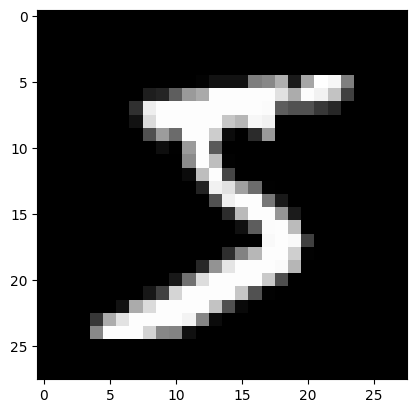

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
y_train.shape

(60000,)

In [10]:
X_train.min()

0

In [11]:
X_train.max()

255

In [12]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled=X_train/255.0
X_test_scaled=X_test/255.0

In [14]:
X_train_scaled.min()

0.0

In [15]:
X_train_scaled.max()

1.0

In [16]:
y_train[0]

5

In [17]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [18]:
type(y_train_onehot)

numpy.ndarray

In [19]:
y_train_onehot.shape

(60000, 10)

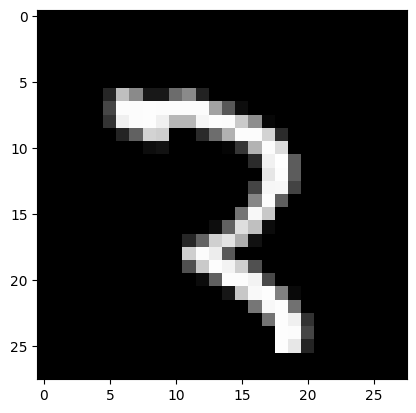

In [20]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [21]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [23]:
model = keras.Sequential()
inputs = keras.Input(shape=(28,28,1))
model.add(inputs)
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(13,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [25]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 30s 31ms/step - loss: 0.3565 - accuracy: 0.8924 - val_loss: 0.1239 - val_accuracy: 0.9631
Epoch 2/5
938/938 [==============================] - 26s 28ms/step - loss: 0.1039 - accuracy: 0.9698 - val_loss: 0.0910 - val_accuracy: 0.9719
Epoch 3/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0729 - accuracy: 0.9784 - val_loss: 0.0715 - val_accuracy: 0.9769
Epoch 4/5
938/938 [==============================] - 35s 37ms/step - loss: 0.0566 - accuracy: 0.9830 - val_loss: 0.0610 - val_accuracy: 0.9787
Epoch 5/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0465 - accuracy: 0.9859 - val_loss: 0.0720 - val_accuracy: 0.9775


In [26]:
metrics = pd.DataFrame(model.history.history)

In [27]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.356515,0.892433,0.123858,0.9631
1,0.103900,0.969800,0.090978,0.9719
2,0.072912,0.978417,0.071493,0.9769
3,0.056567,0.983000,0.061040,0.9787
4,0.046487,0.985917,0.072025,0.9775


<Axes: >

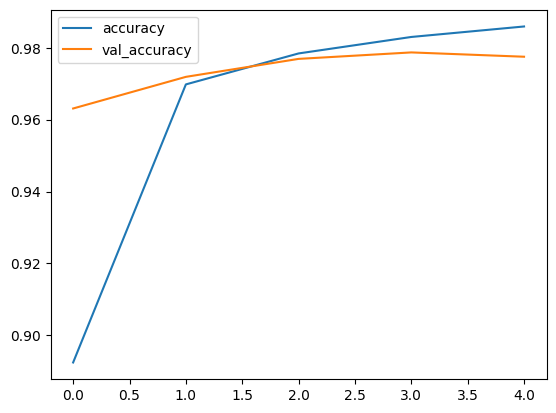

In [28]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

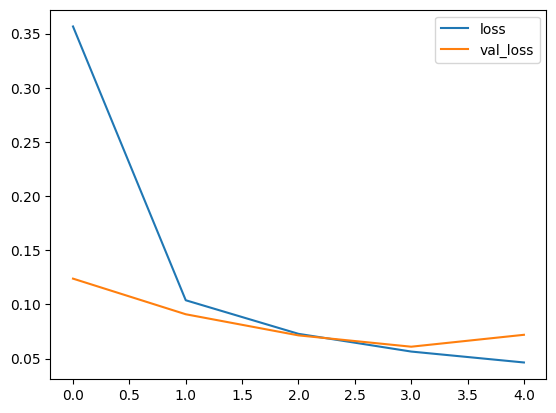

In [29]:
metrics[['loss','val_loss']].plot()

In [30]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 8ms/step


In [31]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 945    0    8    1    0    5    8    0   12    1]
 [   0 1120    8    2    0    0    2    0    3    0]
 [   0    1 1018    3    0    0    0    3    7    0]
 [   0    0    4 1003    0    0    0    0    3    0]
 [   0    0    4    0  957    0    4    0    4   13]
 [   0    0    0   16    0  871    3    0    2    0]
 [   3    2    0    1    0    3  945    0    4    0]
 [   1    2   18    5    2    1    0  990    6    3]
 [   0    0    4    4    0    2    0    2  960    2]
 [   1    3    1   11    3    7    0    4   13  966]]


In [32]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.96      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.95      0.99      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [33]:
img = image.load_img('Number.jpeg')

In [34]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [36]:
img = image.load_img('Number.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [37]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 21ms/step


In [38]:
print(x_single_prediction)

[8]


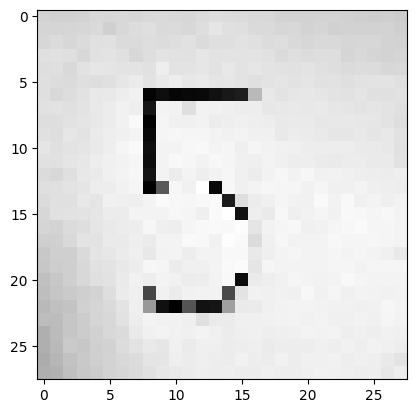

In [39]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [40]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [41]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 34ms/step


In [42]:
print(x_single_prediction)

[5]
